In [ ]:
### BMED318 Hands-on: Segmentation 
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import skimage.filters as fl

In [ ]:
## 1. Binary Segmentation 
# 주어진 영상 p1.jpg 와 p2.jpg 를 binary segmentation 하시오. (배경과 물체 또는 
# 글자가 완벽히 구분되지는 않을지라도 가능한 최선의 결과를 얻으면 됨.) 
p1 = plt.imread('p1.jpg')
p2 = plt.imread('p2.jpg')

Block 1: range 0~30, Threshold = 18.00
Block 2: range 30~60, Threshold = 81.00
Block 3: range 60~90, Threshold = 97.00
Block 4: range 90~120, Threshold = 113.00
Block 5: range 120~150, Threshold = 128.00
Block 6: range 150~180, Threshold = 144.00
Block 7: range 180~210, Threshold = 159.00
Block 8: range 210~240, Threshold = 172.00
Block 9: range 240~270, Threshold = 188.00
Block 10: range 270~300, Threshold = 203.00
Block 11: range 300~330, Threshold = 214.00
Block 12: range 330~369, Threshold = 199.00
Block 1: range 0~65, Threshold = 21.00
Block 2: range 65~130, Threshold = 19.00
Block 3: range 130~195, Threshold = 20.00
Block 4: range 195~260, Threshold = 21.00
Block 5: range 260~325, Threshold = 21.00
Block 6: range 325~390, Threshold = 21.00
Block 7: range 390~455, Threshold = 24.00
Block 8: range 455~520, Threshold = 25.00
Block 9: range 520~585, Threshold = 47.00
Block 10: range 585~650, Threshold = 52.00
Block 11: range 650~715, Threshold = 69.00
Block 12: range 715~780, Thresho

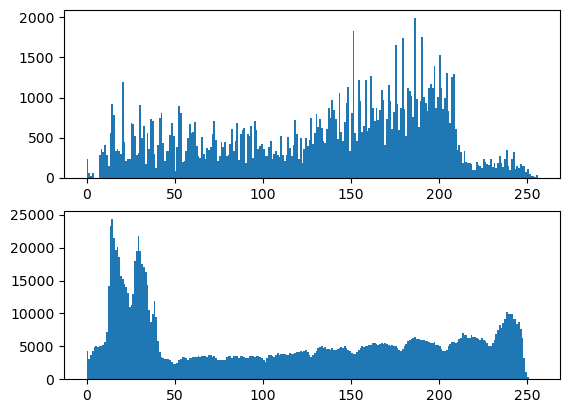

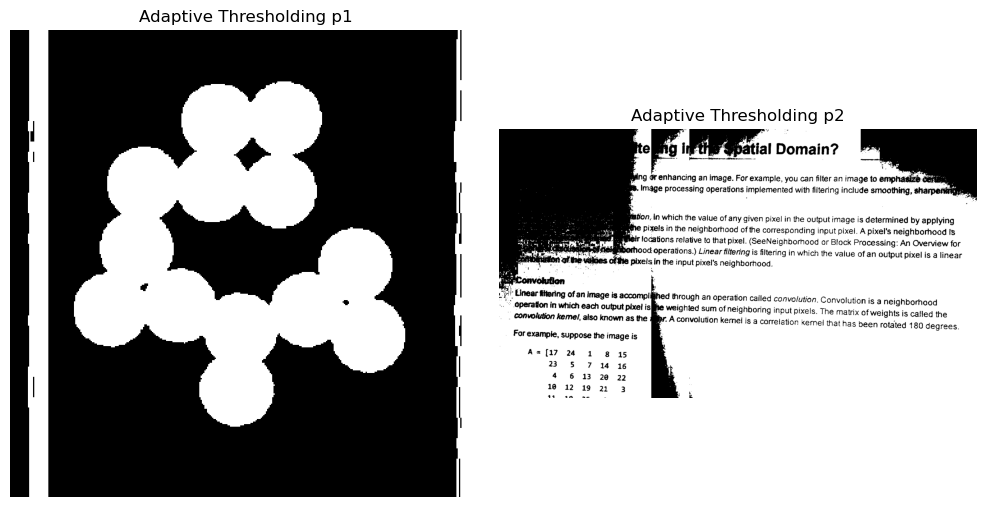

In [ ]:
# 1.1. Try adaptive filter with manuallt determined thresholds from histogram
plt.figure()
plt.subplot(2,1,1)
h1 = plt.hist(p1.ravel(), bins=256, range=[0,256])

plt.subplot(2,1,2)
h2 = plt.hist(p2.ravel(), bins=256, range=[0,256])




def manual_adaptive_threshold(image, num_blocks):
    rows, cols = image.shape
    result = np.zeros((rows, cols), dtype=bool)
    
    block_width = cols // num_blocks
    
    for i in range(num_blocks):
        start = i * block_width
        if i == num_blocks - 1:
            end = cols
        else:
            end = (i + 1) * block_width
            
        block = image[:, start:end]
        
        block_thresh = fl.threshold_otsu(block)
        result[:, start:end] = block > block_thresh
        
        print(f"Block {i+1}: range {start}~{end}, Threshold = {block_thresh:.2f}")

    return result


AdaptiveImage1 = manual_adaptive_threshold(p1, num_blocks=12)
AdaptiveImage2 = manual_adaptive_threshold(p2, num_blocks=25)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(AdaptiveImage1, cmap='gray')
plt.title('Adaptive Thresholding p1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(AdaptiveImage2, cmap='gray')
plt.title('Adaptive Thresholding p2')
plt.axis('off')

plt.tight_layout()
plt.show()

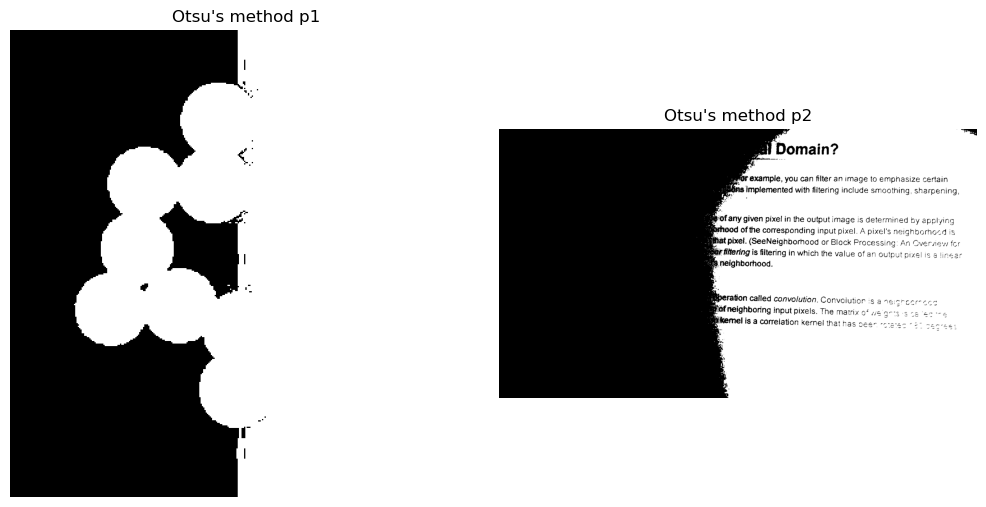

In [ ]:
# 1.2. Try otsu's method to determine thresholds
otsu_t1 = fl.threshold_otsu(p1)
otsu_t2 = fl.threshold_otsu(p2)
OtsuImage1 = p1>otsu_t1
OtsuImage2 = p2>otsu_t2

plt.figure(figsize=(10, 5));
plt.subplot(121); plt.imshow(OtsuImage1, cmap='gray'); plt.axis('off')
plt.title('Otsu\'s method p1')
plt.subplot(122); plt.imshow(OtsuImage2, cmap='gray'); plt.axis('off')
plt.title('Otsu\'s method p2')

plt.tight_layout()
plt.show()

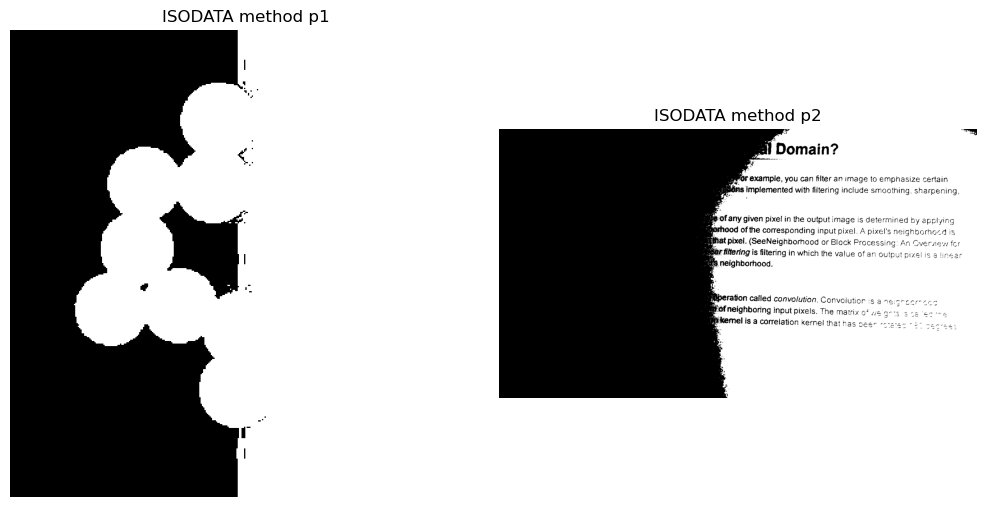

'\nOtsu와 ISODATA는 gloabl threshold를 사용하기 때문에\n조명이 불균일한 사진에서 객체를 제대로 분리하지 못하였습니다.\n반면 adaptive thresholding은 영역을 block별로 나누어서 국소적인 임계값을 사용하여\n그림자 진 부분의 텍스트와 형태를 비교적 잘 검출해냈습니다. \n'

In [ ]:
# import scipy.ndimage as ndi
# 1.3. Try ISODATA to determine thresholds

iso_t1 = fl.threshold_isodata(p1)
iso_t2 = fl.threshold_isodata(p2)
IsoImage1 = p1>iso_t1
IsoImage2 = p2>iso_t2

plt.figure(figsize=(10, 5));
plt.subplot(121); plt.imshow(IsoImage1, cmap='gray'); plt.axis('off')
plt.title('ISODATA method p1')
plt.subplot(122); plt.imshow(IsoImage2, cmap='gray'); plt.axis('off')
plt.title('ISODATA method p2')

plt.tight_layout()
plt.show()

'''
Otsu와 ISODATA는 gloabl threshold를 사용하기 때문에
조명이 불균일한 사진에서 객체를 제대로 분리하지 못하였습니다.
반면 adaptive thresholding은 영역을 block별로 나누어서 국소적인 임계값을 사용하여
그림자 진 부분의 텍스트와 형태를 비교적 잘 검출해냈습니다. 
'''

In [ ]:
## 2. Edge Segmentation  
# 주어진 영상 p3.jpg 에서 sobel, laplace+zero corssing, canny edge detector 을 적용하여
# edge 영상을 생성하고, 결과를 비교해보시오.  
# 각 edge detection 과정에서 결과를 개선하기 위해 추가 작업을 해도 무방.
p3 = plt.imread('p3.jpg')



# 2.1. Sobel
edge_s = fl.sobel(p3)


# 2.2. Laplace + zero crossing
def zero_crossing(image):
    return np.logical_or(
        np.diff(np.sign(image), axis=0, prepend=0) != 0,
        np.diff(np.sign(image), axis=1, prepend=0) != 0
        )
log_image = ndi.gaussian_laplace(p3, sigma=2)
edge_log = zero_crossing(log_image)


# 2.3. Canny edge detector
from skimage import feature
canny_edge = feature.canny(p3, sigma=3.0)

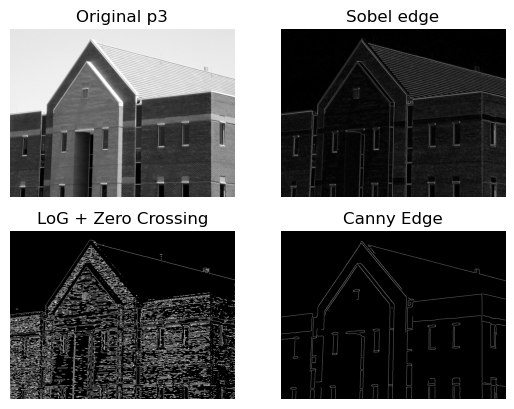

'\nSobel 필터는 엣지 강도를 미분값의 크기로 표현하기 때문에 주요 윤곽이 잘 드러났습니다.\n다만 선이 조금 두껍고 명암의 차이가 있는 결과가 나타났습니다.\nLoG와 Zero Crossing을 결합한 방식은 2차 미분의 특성상 미세한 변화까지 매우 민감하여서\n벽돌 질감같은 세밀한 노이즈까지 과도하게 검출되었습니다.\nCanny Edge Detector는 불필요한 질감은 무시하고 가장 가늘고 선명한 주요 윤관선만\n깔끔하게 추출해냈습니다.\n\n결과적으로 구조적인 형태를 파악하는 데이는 Canny방식이 성능이 가장 좋았고\nLog는 지나치게 복잡하고 상세한 결과를 보여줌을 확인할 숭 있었습니다.\n\n'

In [ ]:
plt.figure()

plt.subplot(221)
plt.imshow(p3, cmap='gray')
plt.axis('off'); plt.title("Original p3")

plt.subplot(222)
plt.imshow(edge_s, cmap='gray')
plt.axis('off'); plt.title("Sobel edge")

plt.subplot(223)
plt.imshow(edge_log, cmap='gray')
plt.axis('off'); plt.title("LoG + Zero Crossing")

plt.subplot(224)
plt.imshow(canny_edge, cmap='gray')
plt.axis('off'); plt.title("Canny Edge")

plt.show()

'''
Sobel 필터는 엣지 강도를 미분값의 크기로 표현하기 때문에 주요 윤곽이 잘 드러났습니다.
다만 선이 조금 두껍고 명암의 차이가 있는 결과가 나타났습니다.
LoG와 Zero Crossing을 결합한 방식은 2차 미분의 특성상 미세한 변화까지 매우 민감하여서
벽돌 질감같은 세밀한 노이즈까지 과도하게 검출되었습니다.
Canny Edge Detector는 불필요한 질감은 무시하고 가장 가늘고 선명한 주요 윤관선만
깔끔하게 추출해냈습니다.

결과적으로 구조적인 형태를 파악하는 데이는 Canny방식이 성능이 가장 좋았고
Log는 지나치게 복잡하고 상세한 결과를 보여줌을 확인할 숭 있었습니다.

'''

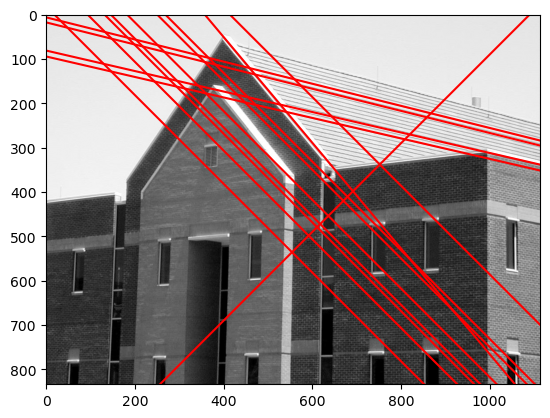

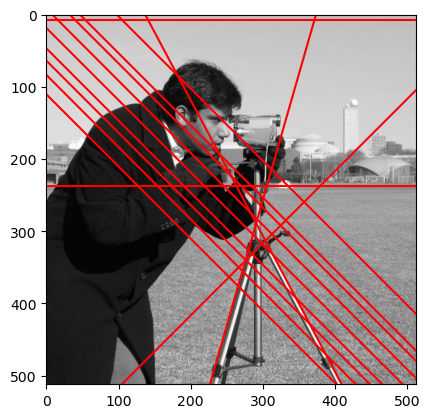

In [ ]:
## 3. Segmentation of Dominant Edges 
# 3.1. p3.jpg 영상에서 주요 직선 edge를 segment하시오.  
# 3.2. p4.jpg 영상에서 반복해보시오. 
# 3.3. p5, p6 영상의 주요 직선을 추출하여 어느 환자가 더 거북목에 가까운지(C자형이 정상) 파악해보시오. 
from skimage.transform import hough_line, hough_line_peaks

def draw_houghlines(image, angles_peaks, dists_peaks):
    plt.figure()
    plt.imshow(image, cmap='gray')
    
    for angle, dist in zip(angles_peaks, dists_peaks):
        assin=np.sin(angle)
        if abs(assin)<1e-6: continue
        x0=0
        x1=image.shape[1]
        y0 = (dist - x0*np.cos(angle))/assin
        y1 = (dist - x1*np.cos(angle))/assin
        plt.plot((x0,x1),(y0,y1), '-r')    
    plt.xlim(0, x1)
    plt.ylim(image.shape[0], 0)
    plt.show()


p3edges = feature.canny(p3, sigma=2.0, low_threshold=0.1, high_threshold=0.3)
hspace, angles, distances = hough_line(p3edges)
accum, angles_peaks, dists_peaks = hough_line_peaks(hspace, angles, distances, num_peaks=15)
draw_houghlines(p3, angles_peaks, dists_peaks)

p4 = plt.imread('p4.jpg')
p4edges = feature.canny(p4, sigma=2.0, low_threshold=0.1, high_threshold=0.3)
hspace, angles, distances = hough_line(p4edges)
accum, angles_peaks, dists_peaks = hough_line_peaks(hspace, angles, distances, num_peaks=15)
draw_houghlines(p4, angles_peaks, dists_peaks)

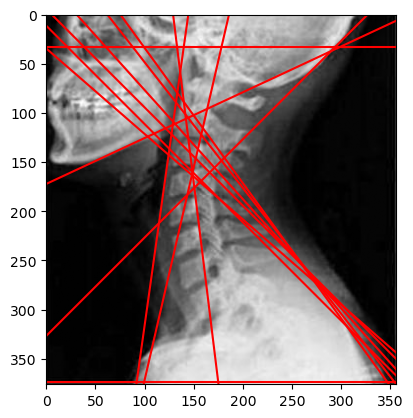

In [ ]:
p5 = plt.imread('p5.jpg')
p5edges = feature.canny(p5, sigma=1.5)
hspace, angles, distances = hough_line(p5edges)
accum, angles_peaks, dists_peaks = hough_line_peaks(hspace, angles, distances, num_peaks=50, threshold=0.2*np.max(hspace))
draw_houghlines(p5, angles_peaks, dists_peaks)

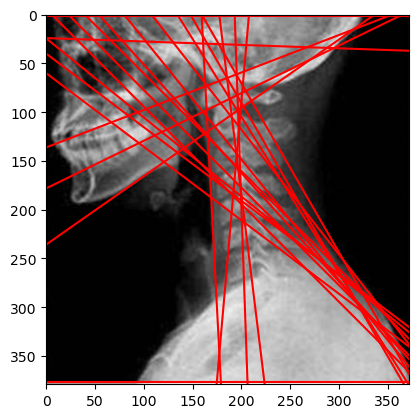

'\n두번째 출력 그림인 p6의 영상이 거북목이 더 가깝습니다.\n\np5의 검출된 붉은색 직선들은 턱아래로 목 부분에서 다양한 기울기를 가집니다. \n이것은 머리의 무게를 효율적으로 분산시키기 위해 앞쪽으로 둥글게 C자형 곡선을 유지하고 있음을\n보여줍니다. 그래서 edge방향 또한 곡선을 따라 다양한 기울기를 가지면서 변화하고 있습니다.\n\np6의 검출된 붉은색 직선들은 턱아래 목부분의 기울기가 비교적 한 쪽에 몰려있습니다.\n이 직선들은 일직선으로 평행하고 몰려있습니다. p5보다 p6에서 몰려있는 일직선들의 수도 맣고 밀도도 더 높습니다.\n목뼈가 일직선으로 뻣뻣하게 서 있는 상태임을 시각적으로 보여줍니다.\n\n'

In [ ]:
p6 = plt.imread('p6.jpg')
p6edges = feature.canny(p6, sigma=1.5)
hspace, angles, distances = hough_line(p6edges)
accum, angles_peaks, dists_peaks = hough_line_peaks(hspace, angles, distances, num_peaks=50, threshold=0.2*np.max(hspace))
draw_houghlines(p6, angles_peaks, dists_peaks)


'''
두번째 출력 그림인 p6의 영상이 거북목이 더 가깝습니다.

p5의 검출된 붉은색 직선들은 턱아래로 목 부분에서 다양한 기울기를 가집니다. 
이것은 머리의 무게를 효율적으로 분산시키기 위해 앞쪽으로 둥글게 C자형 곡선을 유지하고 있음을
보여줍니다. 그래서 edge방향 또한 곡선을 따라 다양한 기울기를 가지면서 변화하고 있습니다.

p6의 검출된 붉은색 직선들은 턱아래 목부분의 기울기가 비교적 한 쪽에 몰려있습니다.
이 직선들은 일직선으로 평행하고 몰려있습니다. p5보다 p6에서 몰려있는 일직선들의 수도 맣고 밀도도 더 높습니다.
목뼈가 일직선으로 뻣뻣하게 서 있는 상태임을 시각적으로 보여줍니다.

'''